In [ ]:
!pip install pandas-datareader;
!pip install yfinance;
!pip install fix_yahoo_finance;
!pip install numpy;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
import plotly.express as px
yf.pdr_override()
from statistics import mean

In [ ]:
data = yf.download('aapl',interval='1D',period='MAX')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
...,...,...,...,...,...,...
2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200
2022-12-15,141.110001,141.800003,136.029999,136.500000,136.500000,98931900
2022-12-16,136.690002,137.649994,133.729996,134.509995,134.509995,160080100


Text(0.5, 1.0, 'Open Price Over Time for Apple')

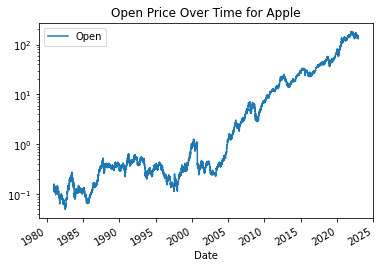

In [ ]:
# Log Scaling (Liane)
y = pd.DataFrame(data['Open']).plot()
plt.yscale('log')
plt.title('Open Price Over Time for Apple')

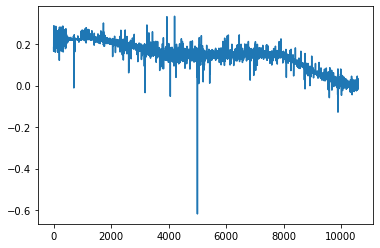

In [ ]:
open = data['Open']
close = data['Adj Close']
pDiff = []

for i in range(0,len(open)-1):
  yes = (open[i+1]-close[i])/open[i+1]
  pDiff.append(yes)

plt.plot(pDiff)

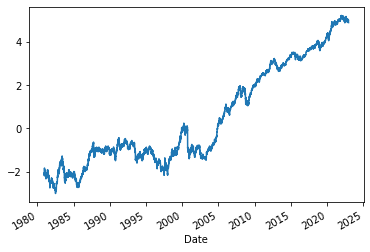

In [ ]:
# Log Scaling (Thuy)
open = np.log(data['Open'])
avg = mean(open)
Q1 = np.quantile(open,0.25)
Q3 = np.quantile(open,0.75)
IQR = Q3 - Q1
IQRange = 1.5*IQR
min = Q1 - IQRange
max = Q3 + IQRange

y_filt = open[open <= max].plot()